In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

**1. Load the dataset into python environment**

In [3]:
df = pd.read_csv(r"/content/titanic_dataset.csv")

**2. Make‘PassengerId’ as the index column**

In [4]:
df.set_index('PassengerId', inplace=True)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**3. Check the basic details of the dataset**

In [5]:
df.shape
print("Number of rows: ", df.shape[0])
print("Number of columns: ", df.shape[1])

Number of rows:  891
Number of columns:  11


In [6]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
df.dtypes

,0
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64
Cabin,object


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [9]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**4. Fill in all the missing values present in all the columns in the dataset**

In [10]:
df.isnull().sum()

,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,687


In [ ]:
#fill 'age' with mean value
df.fillna({'Age': df['Age'].mean()},inplace=True)

#fill 'embarked' with mode
df.fillna({'Embarked':df['Embarked'].mode()[0]},inplace=True)

#drop 'cabin' since its not useful for analysis
df.drop(columns=['Cabin'], inplace=True)

df.isnull().sum()

**5. Check and handle outliers in at least 3 columns in the dataset**

In [ ]:
#remove irrelevant columns
irr_col = ['Name','Ticket']
df = df.drop(columns=irr_col)

Handling outliers of 'Fare'

<Axes: xlabel='Fare', ylabel='Count'>

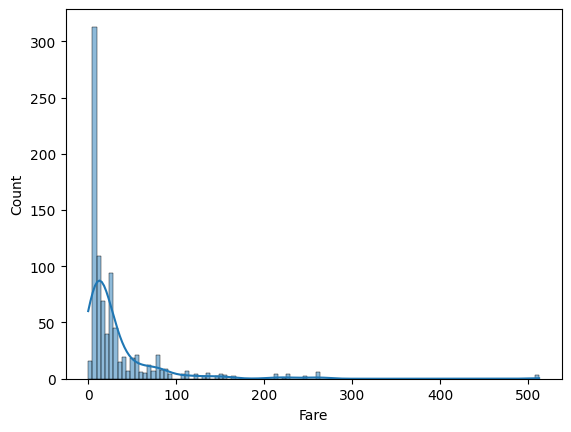

In [24]:
#histplot of 'Fare'
sns.histplot(data=df,x='Fare',kde=True)

<Axes: xlabel='Fare_log', ylabel='Count'>

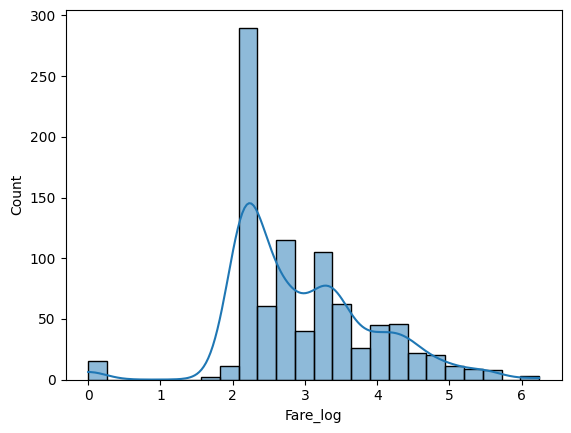

In [25]:
df['Fare_log'] = np.log1p(df['Fare'])

sns.histplot(data=df,x='Fare_log', kde= True)

Handling outliers of 'Age'

<Axes: xlabel='Age', ylabel='Count'>

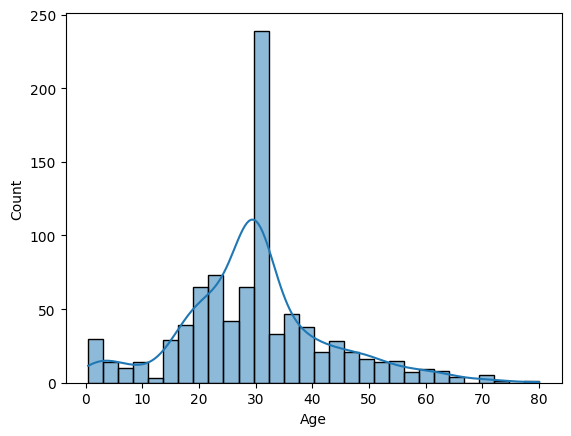

In [43]:
sns.histplot(data=df,x='Age',kde=True)

In [26]:
Q1= df['Age'].quantile(0.25)
Q3 =df['Age'].quantile(0.75)
IQR =Q3 - Q1

lower_bound= Q1 - 1.5 * IQR
upper_bound= Q3 + 1.5 * IQR

df_cleaned =df[(df['Age']>= lower_bound) & (df['Age']<= upper_bound)]

print("Original shape:",df.shape)
print("Cleaned shape:",df_cleaned.shape)

Original shape: (891, 9)
Cleaned shape: (825, 9)


<Axes: xlabel='Age', ylabel='Count'>

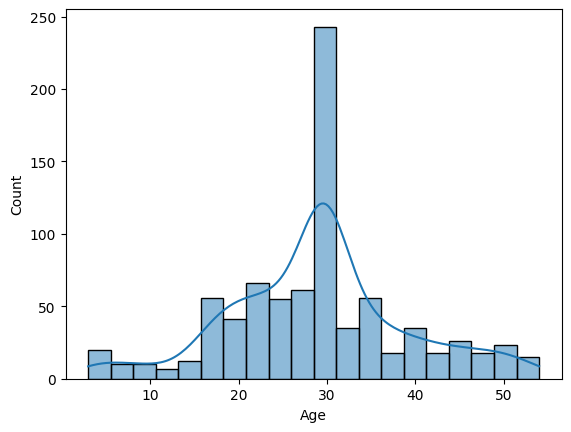

In [28]:
sns.histplot(data=df_cleaned,x='Age', kde= True)

Handling outliers of 'SibSp'

<Axes: xlabel='SibSp', ylabel='Count'>

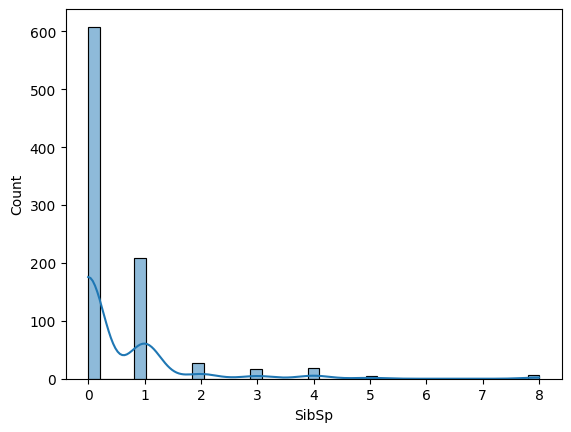

In [41]:
sns.histplot(data=df,x='SibSp',kde=True)

In [39]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['SibSp'].quantile(0.25)
Q3 =df['SibSp'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound =Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_cleaned = df[(df['SibSp'] >= lower_bound) & (df['SibSp'] <= upper_bound)]

# Display the shape of the original and cleaned DataFrame
print("Original shape:", df.shape)
print("Cleaned shape:", df_cleaned.shape)

Original shape: (891, 9)
Cleaned shape: (845, 9)


<Axes: xlabel='SibSp', ylabel='Count'>

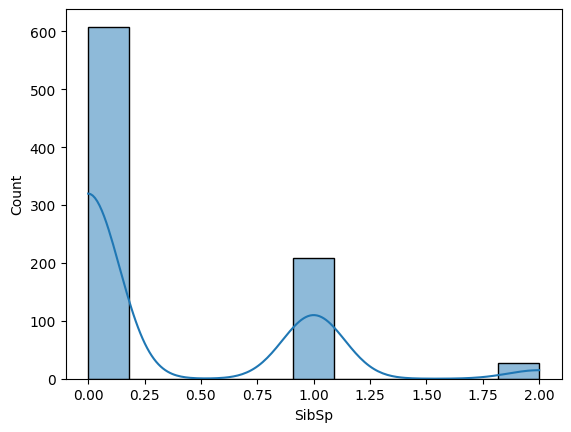

In [42]:
sns.histplot(data=df_cleaned,x='SibSp',kde=True)

**6. Do min-max scaling on the feature set (Take ‘Survived’ as target)**

In [44]:
from sklearn.preprocessing import MinMaxScaler

In [46]:
X = df.drop("Survived", axis=1)
y = df["Survived"]

In [47]:
X = pd.get_dummies(X, drop_first=True)

In [48]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [49]:
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

In [50]:
scaled_data = pd.concat([X_scaled_df, y.reset_index(drop=True)], axis=1)